In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import plotly.express as px

In [3]:
import matplotlib.pyplot as plt

In [23]:
from IPython.display import display

In [4]:
df = pd.read_csv('/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/SAIDA/01_DADOS_SEEG/SEEG_MT.csv')

In [5]:
df.head()

,Unnamed: 0,Setor de emissão,Categoria emissora,Sub-categoria emissora,Produto ou sistema,Detalhamento,Recorte,Atividade geral,Bioma,Emissão/Remoção/Bunker,...,2016,2017,2018,2019,2020,2021,2022,2023,Municipio,Estado
0,0,Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Amazônia,Emissão,...,0.003332,0.006621,0.002503,0.002880,0.005750,0.014107,0.103211,0.0,Água Boa,MT
1,1,Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Amazônia,Emissão,...,47.121735,59.756070,25.825434,28.491009,91.135181,73.347309,389.388256,0.0,Alta Floresta,MT
2,2,Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Amazônia,Emissão,...,13.285182,46.651478,22.917887,28.809071,40.993550,6.199127,165.577469,0.0,Alto Boa Vista,MT
3,3,Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Amazônia,Emissão,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,Alto Paraguai,MT
4,4,Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Amazônia,Emissão,...,0.785362,0.000000,0.000000,0.000000,0.000000,29.338924,155.755303,0.0,Apiacás,MT


In [6]:
df.columns

Index(['Unnamed: 0', 'Setor de emissão', 'Categoria emissora',
       'Sub-categoria emissora', 'Produto ou sistema', 'Detalhamento',
       'Recorte', 'Atividade geral', 'Bioma', 'Emissão/Remoção/Bunker', 'Gás',
       'Cidade', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', 'Municipio', 'Estado'],
      dtype='object')

In [7]:
df.dtypes

,0
Unnamed: 0,int64
Setor de emissão,object
Categoria emissora,object
Sub-categoria emissora,object
Produto ou sistema,object
...,...
2021,float64
2022,float64
2023,float64
Municipio,object


In [8]:
# Seleciona apenas as colunas numéricas
numerical_columns = df.select_dtypes(include=['number'])

# Calcula a soma de cada coluna
sum_columns = numerical_columns.sum()

# Filtra as colunas que somam zero
columns_with_zero_sum = sum_columns[sum_columns == 0]

columns_with_zero_sum

,0


In [9]:
# Defina a lista de anos
anos = ['1997', '2003', '2010', '2015', '2023']

Proporção de emissões por CO2e (t) GTP-AR6 e CO2e (t) GWP-AR6

In [10]:
#Gerando o treemap de setor de emissão para cada ano
for ano in anos:
    # Filtra os dados para remover linhas onde o valor do ano é nulo ou zero
    df_filtered = df[df[ano].notna() & (df[ano] != 0)]

    # Se houver dados válidos para o ano, gerar o treemap
    if not df_filtered.empty:
        fig = px.treemap(df_filtered,
                         path=['Gás', 'Setor de emissão'],
                         values=ano,
                         color=ano,
                         color_continuous_scale='rainbow',
                         title=f'Emissões de GEE por Setor de Emissão (tCO₂e) - {ano}'
                         )

        fig.update_layout(height=1200, width=800,
                          legend_title='(tCO₂e)',
                          font=dict(family='Arial', size=12),
                          coloraxis_colorbar=dict(title='(tCO₂e)'),
                          title_x=0.5,  # Centraliza o título,
                          title_y=0.95  # Ajusta a posição vertical do título (opcional, se necessário)
                          )

        fig.show()
    else:
        print(f'Nenhum dado válido para o ano {ano}.')

Tabela de porcentagens para o gás CO2e (t) GTP-AR6:


,1997,2003,2010,2015,2023
Setor de emissão,,,,,
Agropecuária,2.6,2.6,23.0,16.8,19.5
Mudança de Uso da Terra e Floresta,97.4,97.4,70.1,76.0,73.3
Resíduos,0.0,0.0,0.3,0.2,0.2
Energia,NaN,NaN,6.7,6.7,6.6
Processos Industriais,NaN,NaN,NaN,0.3,0.3


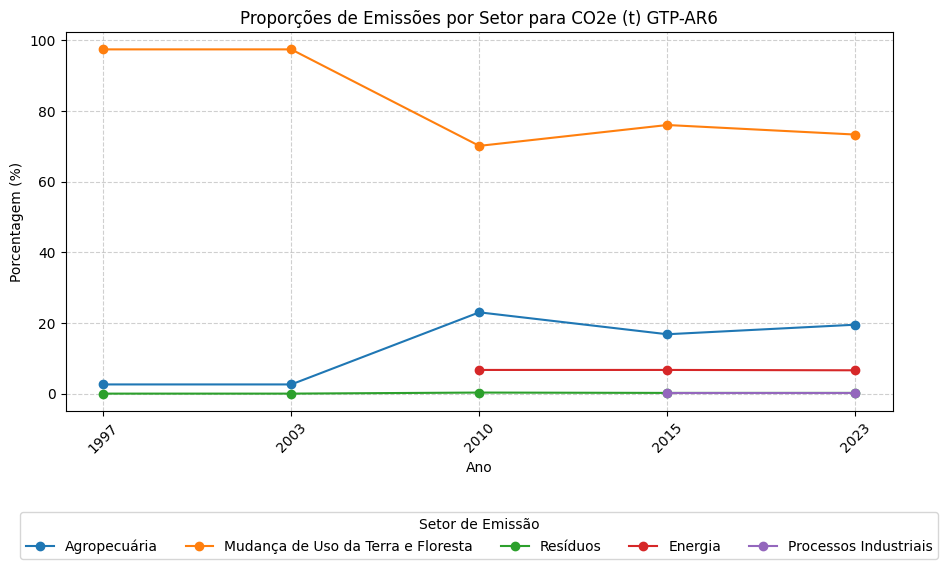

Tabela de porcentagens para o gás CO2e (t) GWP-AR6:


,1997,2003,2010,2015,2023
Setor de emissão,,,,,
Agropecuária,7.4,6.9,44.4,33.7,34.7
Mudança de Uso da Terra e Floresta,92.6,93.0,50.5,60.3,59.2
Resíduos,0.1,0.1,0.7,0.7,0.7
Energia,NaN,NaN,4.4,5.1,5.1
Processos Industriais,NaN,NaN,NaN,0.2,0.2


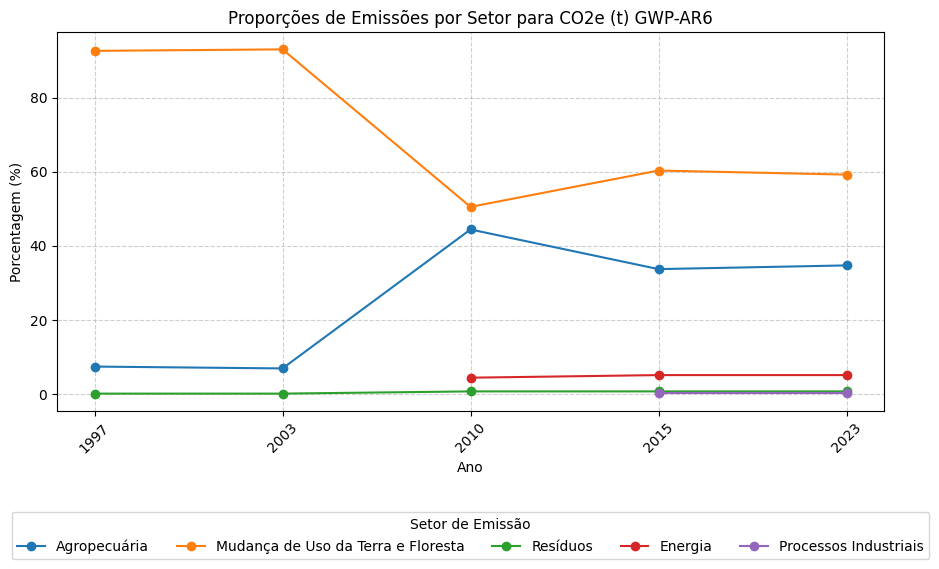

In [32]:
# Gerando um DataFrame para cada Gás, onde as colunas são os anos e as linhas são os Setores de Emissão, com porcentagens arredondadas
df_gases = {}

for gas in df['Gás'].unique():  # Itera sobre cada Gás
    # Filtra os dados para o gás específico
    df_gas = df[df['Gás'] == gas]

    # Lista para armazenar os DataFrames dos anos
    df_years = []

    for ano in anos:
        # Filtra os dados para o ano específico
        df_filtered = df_gas[df_gas[ano].notna() & (df_gas[ano] != 0)]

        # Agrupa os dados por Setor de Emissão e soma os valores para o ano
        df_ano = df_filtered.groupby('Setor de emissão')[ano].sum()

        # Calcula o total de emissões por Gás para o ano
        total_por_gas = df_ano.sum()

        # Calcula a porcentagem para cada Setor de Emissão e arredonda para 1 casa decimal
        df_ano_percent = ((df_ano / total_por_gas) * 100).round(1)

        # Adiciona o DataFrame de porcentagens para o ano
        df_years.append(df_ano_percent)

    # Concatena os DataFrames para os anos, fazendo com que as colunas sejam os anos e as linhas sejam os setores
    df_gas_final = pd.concat(df_years, axis=1)

    # Renomeia as colunas para que tenham o nome do ano
    df_gas_final.columns = [str(ano) for ano in anos]

    # Armazena o DataFrame para cada gás no dicionário
    df_gases[gas] = df_gas_final

    # Exibe o DataFrame resultante para o gás
    print(f"Tabela de porcentagens para o gás {gas}:")
    display(df_gas_final)

    # Gerando o gráfico de linhas
    plt.figure(figsize=(10, 6))
    for setor in df_gas_final.index:
        plt.plot(df_gas_final.columns, df_gas_final.loc[setor], marker='o', label=setor)

    # Configuração do gráfico
    plt.title(f"Proporções de Emissões por Setor para {gas}")
    plt.xlabel("Ano")
    plt.ylabel("Porcentagem (%)")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Ajustando a legenda com 5 colunas abaixo do gráfico
    plt.legend(title="Setor de Emissão", bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=5)

    # Ajustando o layout para não sobrepor o gráfico e a legenda
    plt.tight_layout()

    # Exibe o gráfico
    plt.show()

**Análise multitemporal da emissão de gases por Setor de emissão (Toda a série temporal do SEEG)**

In [11]:
# Lista de anos de 1970 a 2023
anos_t = [str(ano) for ano in range(1970, 2024)]
anos_t

['1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023']

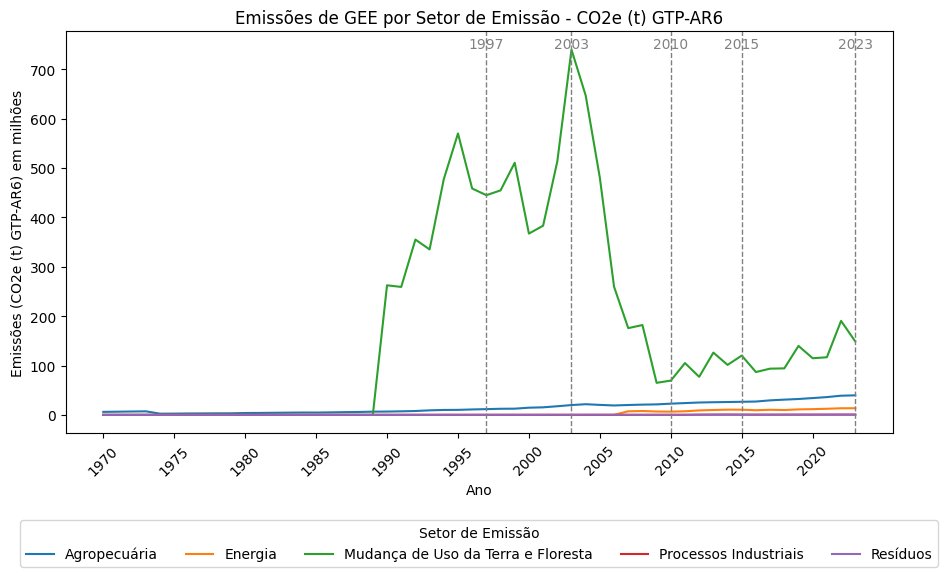

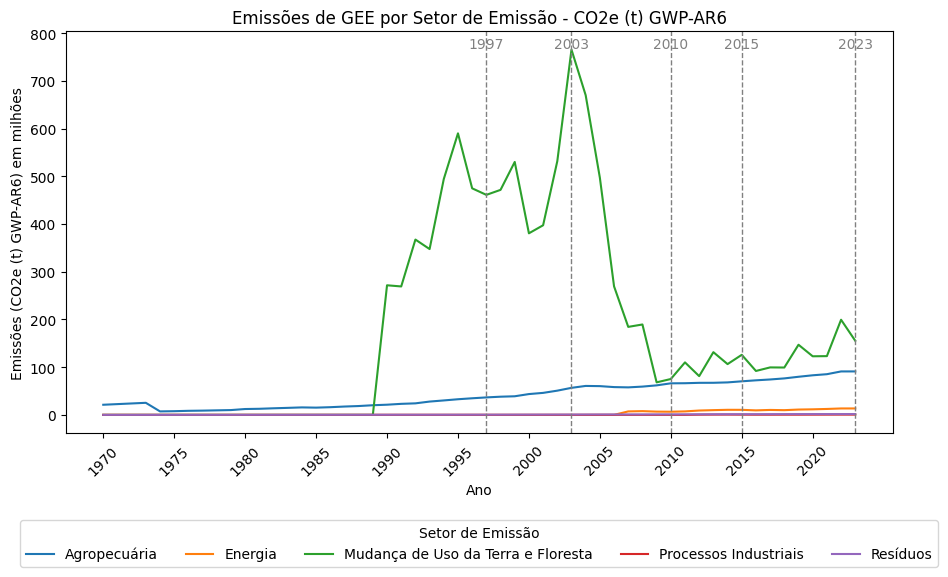

In [34]:
# Filtrando os dados para cada tipo de gás
for gas in df['Gás'].unique():
    # Filtrando o DataFrame para o gás atual
    df_gas = df[df['Gás'] == gas]

    # Agrupando por 'Setor de emissão' e somando as emissões por ano
    df_grouped = df_gas.groupby('Setor de emissão')[anos_t].sum()

    # Plotando o gráfico de linha para cada 'Setor de emissão'
    plt.figure(figsize=(10, 6))
    for setor in df_grouped.index:
        # Dividindo as emissões por 1 milhão
        plt.plot(anos_t, df_grouped.loc[setor] / 1e6, label=setor)  # Em milhões

    # Adicionando título e legendas
    plt.title(f'Emissões de GEE por Setor de Emissão - {gas}')
    plt.xlabel('Ano')
    plt.ylabel(f'Emissões ({gas}) em milhões')

    # Ajustando os ticks do eixo X para exibir apenas a cada 5 anos
    ticks = [str(ano) for ano in range(1970, 2024, 5)]  # Ticks de 5 em 5 anos
    plt.xticks(ticks, rotation=45)  # Rotacionando os ticks para uma visualização melhor

    # Adicionando linhas verticais tracejadas nos anos de interesse e os rótulos
    anos_interesse = ['1997', '2003', '2010', '2015', '2023']
    for ano in anos_interesse:
        plt.axvline(x=ano, color='gray', linestyle='--', linewidth=1)
        # Adicionando o texto ao lado da linha
        plt.text(ano, plt.gca().get_ylim()[1] * 0.95, ano,
                 ha='center', va='bottom', color='gray', fontsize=10)

    # Exibindo a legenda abaixo do gráfico, com 5 colunas
    plt.legend(title='Setor de Emissão', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=5)

    # Exibindo o gráfico
    plt.tight_layout()
    plt.show()

**Análise multitemporal da emissão de gases por Setor de emissão (A partir de 1985)**

In [13]:
# Lista de anos de 1985 a 2023
anos_s = [str(ano) for ano in range(1985, 2024)]
anos_s

['1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023']

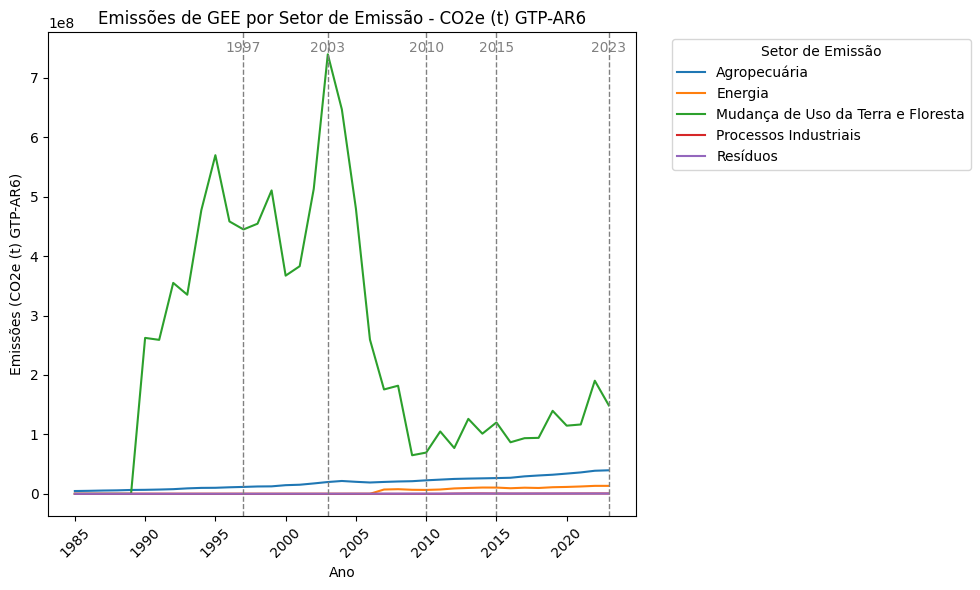

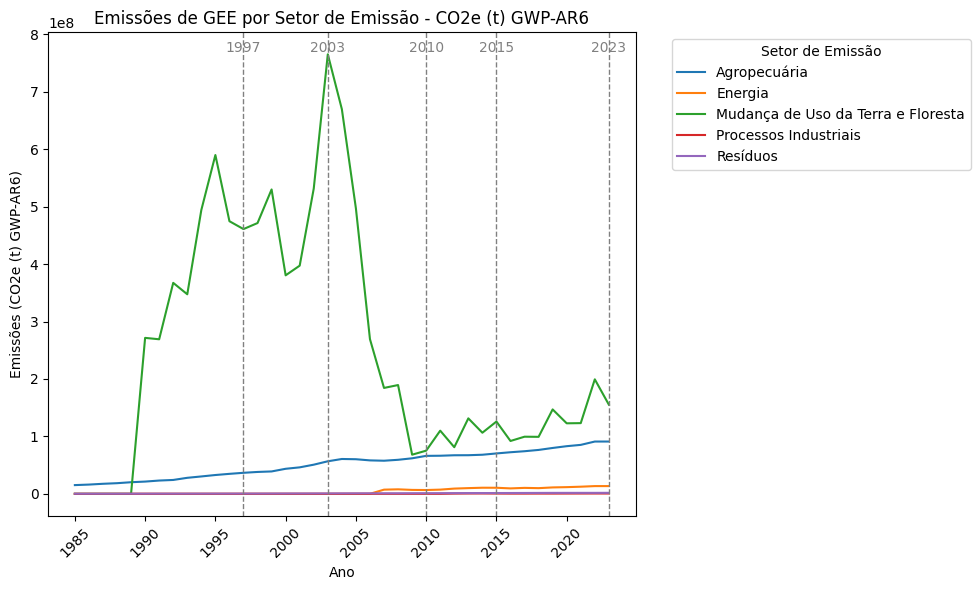

In [14]:
# Filtrando os dados para cada tipo de gás
for gas in df['Gás'].unique():
    # Filtrando o DataFrame para o gás atual
    df_gas = df[df['Gás'] == gas]

    # Agrupando por 'Setor de emissão' e somando as emissões por ano
    df_grouped = df_gas.groupby('Setor de emissão')[anos_s].sum()

    # Plotando o gráfico de linha para cada 'Setor de emissão'
    plt.figure(figsize=(10, 6))
    for setor in df_grouped.index:
        plt.plot(anos_s, df_grouped.loc[setor], label=setor)

    # Adicionando título e legendas
    plt.title(f'Emissões de GEE por Setor de Emissão - {gas}')
    plt.xlabel('Ano')
    plt.ylabel(f'Emissões ({gas})')

    # Ajustando os ticks do eixo X para exibir apenas a cada 5 anos
    ticks = [str(ano) for ano in range(1985, 2024, 5)]  # Ticks de 5 em 5 anos
    plt.xticks(ticks, rotation=45)  # Rotacionando os ticks para uma visualização melhor

    # Adicionando linhas verticais tracejadas nos anos de interesse e os rótulos
    anos_interesse = ['1997', '2003', '2010', '2015', '2023']
    for ano in anos_interesse:
        plt.axvline(x=ano, color='gray', linestyle='--', linewidth=1)
        # Adicionando o texto ao lado da linha
        plt.text(ano, plt.gca().get_ylim()[1] * 0.95, ano,
                 ha='center', va='bottom', color='gray', fontsize=10)

    # Exibindo a legenda
    plt.legend(title='Setor de Emissão', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Exibindo o gráfico
    plt.tight_layout()
    plt.show()

**Análises em áreas protegidas**

In [15]:
# Filtrando os dados para categorias de 'Em área protegida' e 'Fora de área protegida'
protected_area = df[df['Recorte'] == 'Em área protegida']
unprotected_area = df[df['Recorte'] == 'Fora de área protegida']

# Somando os valores de CO2e para essas duas categorias em cada ano
total_protected = protected_area[['1997', '2003', '2010', '2015', '2023']].sum()
total_unprotected = unprotected_area[['1997', '2003', '2010', '2015', '2023']].sum()

# Exibindo os totais para as duas categorias e comparando com o total geral
print("Total de 'Em área protegida':")
print(total_protected)

print("Total de 'Fora de área protegida':")
print(total_unprotected)

# Somando os totais e comparando com o total global
total_combined = total_protected + total_unprotected
print("Soma das emissões de 'Em área protegida' e 'Fora de área protegida':")
print(total_combined)

Total de 'Em área protegida':
1997   -2.574494e+07
2003   -1.937511e+07
2010   -3.410067e+07
2015   -3.552953e+07
2023   -2.065498e+07
dtype: float64
Total de 'Fora de área protegida':
1997    9.013222e+08
2003    1.475050e+09
2010    1.732080e+08
2015    2.724923e+08
2023    3.130228e+08
dtype: float64
Soma das emissões de 'Em área protegida' e 'Fora de área protegida':
1997    8.755773e+08
2003    1.455675e+09
2010    1.391073e+08
2015    2.369628e+08
2023    2.923679e+08
dtype: float64


In [16]:
# Filtrando os registros com os valores 'Em área protegida' e 'Fora de área protegida' na coluna 'Recorte'
df_filtered_area = df[df['Recorte'].isin(['Em área protegida', 'Fora de área protegida'])]

In [17]:
# Filtrando os registros com o valor 'CO2e (t) GTP-AR6' na coluna 'Gás' no DataFrame já filtrado pela coluna 'Recorte'
df_filtered_final = df_filtered_area[df_filtered_area['Gás'] == 'CO2e (t) GTP-AR6']

# Exibindo as primeiras linhas do DataFrame final filtrado para conferir
df_filtered_final.head()

,Unnamed: 0,Setor de emissão,Categoria emissora,Sub-categoria emissora,Produto ou sistema,Detalhamento,Recorte,Atividade geral,Bioma,Emissão/Remoção/Bunker,...,2016,2017,2018,2019,2020,2021,2022,2023,Municipio,Estado
53124,53336,Mudança de Uso da Terra e Floresta,Alterações de uso da terra,Desmatamento,Floresta primária -- Área sem Vegetação,Floresta alagável -- Área urbanizada,Em área protegida,Outros (geral),Amazônia,Emissão,...,53.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,Feliz Natal,MT
53125,53337,Mudança de Uso da Terra e Floresta,Alterações de uso da terra,Desmatamento,Floresta primária -- Área sem Vegetação,Floresta alagável -- Área urbanizada,Em área protegida,Outros (geral),Amazônia,Emissão,...,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,Marcelândia,MT
53126,53338,Mudança de Uso da Terra e Floresta,Alterações de uso da terra,Desmatamento,Floresta primária -- Área sem Vegetação,Floresta alagável -- Área urbanizada,Em área protegida,Outros (geral),Amazônia,Emissão,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,São Félix do Araguaia,MT
53130,53342,Mudança de Uso da Terra e Floresta,Alterações de uso da terra,Desmatamento,Floresta primária -- Área sem Vegetação,Floresta alagável -- Área urbanizada,Fora de área protegida,Outros (geral),Amazônia,Emissão,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.0,Alta Floresta,MT
53131,53343,Mudança de Uso da Terra e Floresta,Alterações de uso da terra,Desmatamento,Floresta primária -- Área sem Vegetação,Floresta alagável -- Área urbanizada,Fora de área protegida,Outros (geral),Amazônia,Emissão,...,0.0,0.0,0.0,0.0,373.0,53.0,0.0,107.0,Apiacás,MT


In [18]:
#Gerando o treemap de setor de emissão para cada ano
for ano in anos:
    # Filtra os dados para remover linhas onde o valor do ano é nulo ou zero
    df_filtered_ap = df_filtered_final[df_filtered_final[ano].notna() & (df_filtered_final[ano] != 0)]

    # Se houver dados válidos para o ano, gerar o treemap
    if not df_filtered_ap.empty:
        fig = px.treemap(df_filtered_ap,
                         path=['Recorte', 'Setor de emissão'],
                         values=ano,
                         color=ano,
                         color_continuous_scale='rainbow',
                         title=f'Emissões de CO2e (t) GTP-AR6 - {ano}'
                         )

        fig.update_layout(height=1200, width=800,
                          legend_title='(tCO₂e)',
                          font=dict(family='Arial', size=12),
                          coloraxis_colorbar=dict(title='(tCO₂e)'),
                          title_x=0.5,  # Centraliza o título,
                          title_y=0.95  # Ajusta a posição vertical do título (opcional, se necessário)
                          )

        fig.show()
    else:
        print(f'Nenhum dado válido para o ano {ano}.')